In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from matplotlib.cm import get_cmap
import seaborn as sns
%run finance.ipynb

names = ['MSCI World', "MSCI World", 'S&P 500', 'Euro Stoxx 50 Nr.1', \
         'China', 'India', 'Emerging Asia', 'Small Caps USA Nr.1', \
        'Small Caps USA Nr.2', 'Dividenden Aristocrats Nr.1', 'Dividenden Aristocrats Nr.2', 'Growth Nr.1', 'Growth Nr.2',  \
        'REIT', 'TIPS', 'Money Market', 'GER Bonds 10y','US Bonds 1-3y', 'US Bonds 20y']

ETFs = ['WLD.PA', 'EUNL.DE', 'SPY', 'EXFN.L',  \
        'LG9.SI', 'LG8.SI', 'AASI.PA', 'SXRG.F', 'ISP6.L', 'XDND.F', 'UDVD.L', 'IDJG.AS', 'LGWT.DE', \
            'XREA.F', 'EMI.MI', 'C101.F', '8523.F', 'XUT3.L', 'IDTL.L']

bond_info = pd.read_excel("../ETF_investing.xlsx", sheet_name="Bonds")
etf_info = pd.read_excel("../ETF_investing.xlsx", sheet_name="ETF")
bond_info = bond_info[['Name', 'ISIN', 'yahoo ticker', 'physical', 'Acc']]
etf_info = etf_info[['Name', 'ISIN', 'yahoo ticker', 'physical', 'Acc']]

info = pd.concat([etf_info, bond_info])
info.reset_index(inplace=True)

text = "Nr         Category         Name         ISIN\n"  
name_list = []

for n, asset in enumerate(ETFs):
    full_name = str(info[info['yahoo ticker'] == asset]['Name']).split("\n")[0].split("    ")[1]
    ISIN = str(info[info['yahoo ticker'] == asset]['ISIN']).split("\n")[0].split("    ")[1]
    text += str(n) + "         " + names[n] + "         " + full_name + "         " + ISIN +"\n"
    name_list.append(full_name)

In [8]:
for n, name in enumerate(ETFs):
    df = pd.read_csv("data/{0}.csv".format(name))
    df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)
    print(name_list[n], df['Date'].min())

Lyxor MSCI World UCITS ETF D-EUR 2006-05-04 00:00:00
iShares Core MSCI World UCITS ETF USD (Acc) 2009-11-05 00:00:00
SPDR S&P 500 UCITS ETF 1993-01-29 00:00:00
iShares EURO STOXX 50 ex-Financials UCITS ETF 2013-12-20 00:00:00
Xtrackers MSCI China Index UCITS ETF 1C 2010-07-02 00:00:00
Xtrackers MSCI India Index UCITS ETF 1C 2010-07-02 00:00:00
Amundi MSCI Emerging Markets Asia UCITS ETF - ... 2011-05-02 00:00:00
iShares MSCI USA Small Cap UCITS ETF (Acc) 2012-09-21 00:00:00
iShares S&P SmallCap 600 UCITS ETF 2008-05-09 00:00:00
Xtrackers MSCI North America High Dividend Yie... 2014-02-27 00:00:00
SPDR S&P US Dividend Aristocrats UCITS ETF 2011-10-20 00:00:00
iShares EURO Total Market Growth Large UCITS ETF 2008-01-02 00:00:00
Lyxor MSCI EMU Growth (DR) UCITS ETF D-EUR 2008-01-02 00:00:00
Xtrackers FTSE Developed Europe Ex UK Property... 2014-09-25 00:00:00
Lyxor EuroMTS Inflation Linked Investment Grad... 2005-09-09 00:00:00
ComStage Commerzbank FED Funds Effective Rate ... 2009-01-02 

In [2]:
total_amount = 100
nums = [0, -2]
portfolio = [ETFs[n] for n in nums]
content = [name_list[n] for n in nums]

### parameter: full bond portfolio
#parameters = np.array([[0, 0, 0.003], [1, 0, 0.0012]])
### parameter: full stock portfolio
parameters = np.array([[1, 0, 0.003], [0, 0, 0.0012]])

In [3]:
### Compute return risk for maximum range of dates between all ETFs in portfolio

mindate = []
maxdate = []
all_dfs = []
data = {}
for n, etf in enumerate(portfolio):
    df = pd.read_csv("data/{0}.csv".format(etf))
    df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)
    ### fill in missing data points
    df = clean_data_with_outliers(df)
    all_dfs.append(df)
    Min = df['Date'].min()
    Max = df['Date'].max()
    ### Get overall daterange, where there is data for each stock
    mindate.append(Min)
    maxdate.append(Max)
### Get overlapping dates
mindate = max(sorted(mindate))
maxdate = min(sorted(maxdate))
range_days = int((maxdate - mindate).days) + 1
num_data = np.zeros((range_days, len(portfolio)))

for n, etf in enumerate(portfolio):
    df = all_dfs[n]
    df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)
    ### fill in missing data points
    data[etf] = np.array(df['Adj Close'][(df['Date'] >= mindate) & (df['Date'] <= maxdate)])
    num_data[:,n] = data[etf]
### each row represents data of one stock
num_data = num_data.transpose()

print(mindate, maxdate)
r = portfolio_return_risk(num_data, parameters, total_amount)
print(r)

2009-09-08 00:00:00 2019-06-14 00:00:00
0
Only one stock is part of portfolio, because of stock mix!
(6.83242854987914, 1363.6376423493095)


/home/chris/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


2009-09-08 00:00:00 2010-09-08 05:49:12 1


/home/chris/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


1
Only one stock is part of portfolio, because of stock mix!
0
Only one stock is part of portfolio, because of stock mix!
2009-09-08 00:00:00 2012-09-07 17:27:36 3
1
Only one stock is part of portfolio, because of stock mix!
0
Only one stock is part of portfolio, because of stock mix!
2009-09-08 00:00:00 2014-09-08 05:06:00 5
1
Only one stock is part of portfolio, because of stock mix!
0
Only one stock is part of portfolio, because of stock mix!
2009-09-08 00:00:00 2016-09-07 16:44:24 7
1
Only one stock is part of portfolio, because of stock mix!
0
Only one stock is part of portfolio, because of stock mix!


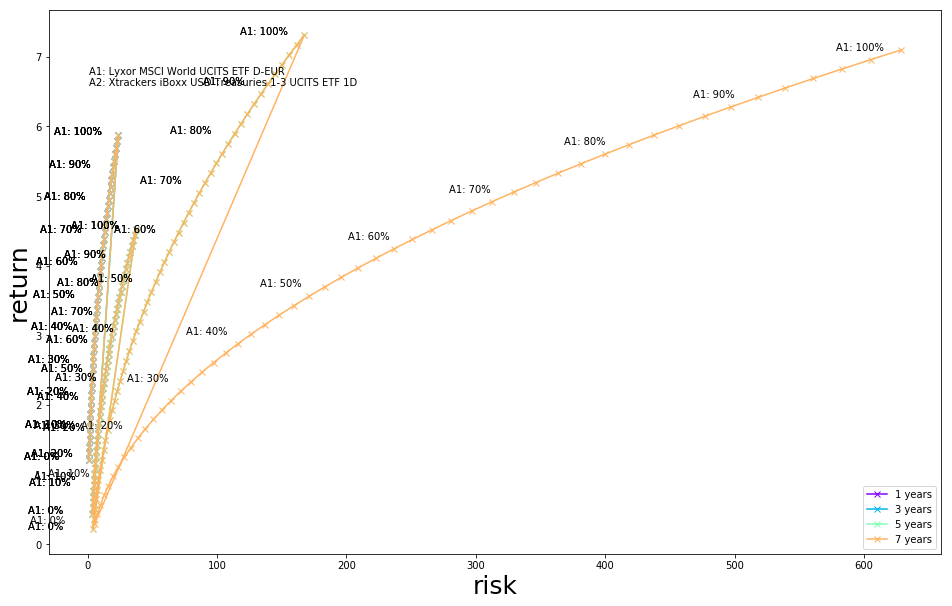

In [4]:
### Plot return-risk curve
ret, var, label = [], [], []
#cmap = get_cmap('Oranges')
colors = iter(cm.rainbow(np.linspace(0,1,5)))

plt.figure(figsize=(16,10));
for years in range(1, 9, 2):
    maxdate = mindate + pd.to_timedelta(years, unit='y')
    print(mindate, maxdate, years)
    for n in range(0, 101, 2):
        parameters = np.array([[n/100, 0, 0.003], [1.-n/100, 0, 0.0012]]);
        num_data = prepare_portfolio_data(mindate, maxdate, portfolio)
        out = portfolio_return_risk(num_data, parameters, total_amount);
        ret.append(out[0]);
        var.append(out[1]);
        if n%10 == 0:
            label.append((var[-1], ret[-1], "A1: {0:.0f}%".format(n)))
    c = next(colors)
    plt.plot(var, ret, 'x-',c=c, label="{0} years".format(years));
    for text in label:
        plt.text(text[0]-50, text[1], text[2])
plt.text(min(var)*1.1, max(ret)*0.9, "\n".join(["A{0}: {1}".format(n+1, x) for n, x in enumerate(content)]))
plt.xlabel("risk", fontsize=25);
plt.ylabel("return", fontsize=25);
plt.legend(loc=4)

In [5]:
max(var)

628.4401412535173